# Evaluating and Optimizing Machine Learning Techniques for Automatic Nuclei Detection

<b>1. Motivation</b>

Many people die from cancer every year. This is terribly sad. :’( We would like to prevent this. One option is to identify the cancer early; treatment of nascent cancers tends to be more successful. Often, cells suffering from cancer display different biomarkers in their nuclei. These biomarkers can be seen in immunohistochemical (IHC) imaging. If there were a rapid and accurate way to screen images for cancerous cells, many cancer prognoses could be improved. We aim to develop an automated cell nuclei detection technique.

<b>2. Challenges</b>

Imaging conditions can vary tremendously - illumination, contrast, fluorescence and staining will all affect the appearance of the cell. We would also like our technique to be generalizable to many cell types because cancer is insidious and affects many cell types. Depending on the biological sample that was imaged, cells may also be aggregated; where a trained eye could distinguish individual nuclei, an algorithm might falter. 

<b>3. Pre-treatment and Initial Segmentation (“Detection”)</b>

Colour is usually either normalized or thresholded to remove noise and background [1]. A variety of pre-processing techniques can be used to find objects, from conventional blob detection, to morphological and/or contour resolution, to watershed segmentation [2-4]. We will use sensible discretion to pick a pre-treatment technique.

<b>4. Segmentation and Identification</b>

There are two primary approaches to cell segmentation:

<b><i>Traditional methods segment nuclei from single or overlapping cells</i></b>

Several traditional methods, often involving a-priori knowledge of cell shape and size [5]. First, cell clusters are segmented from the background by concavity [6-7]. Next, cell clusters can be separated into individual cells based on the concavity of the intensity distribution [7]. After individual cells have been identified, cell boundaries are often approximated using elliptical curve-fitting techniques [5,7]. Further segmentation can be applied to separate the cell nucleus from the cytoplasm. A gradient vector flow active contour model (GVF-ACM) has been shown to find boundaries between the nucleus and cytoplasm [8].

In this work, we can begin performing segmentation using the scikit-image package for python. This package includes methods for ellipse and boundary fitting, as well as edge detection and active contour modeling.

<b><i>Machine learning methods identify nuclei via classification algorithms</i></b>

Machine learning and pattern recognition have been successfully used to identify and segment cells in IHC images [9]. Whether using techniques such as cluster analysis [10], random forests [9], or deep neural networks [11-13], the workflow is similar. First, initial segmentation is performed (often in the pre-treatment step) to find cells and agglomerates. Then, training data is fed through a classifier to extract the most important features. Repeating this process while keeping only the most important feature vectors establishes a model, which is finally used to classify new test data.

We will start with cluster analysis and random forest classifiers (from the scikit-learn package), but likely will also employ traditional GVF or ellipse-fitting algorithms (which we will implement in python) to refine initial segmentation. If necessary, we also intend to look into convolutional neural networks implemented with the TensorFlow package.

### References

[1] M. Veta, P.J. Van Diest, R. Kornegoor, A. Huisman, M.A. Viergever, and J.P.W. Pluim. (<b>2013</b>) Automatic Nuclei Segmentation in H&E Stained Breast Cancer Histopathology Images. <i>PLoS One</i>, 8, 7.

[2] X. Yang, H. Li, and X. Zhou. (<b>2006</b>) Nuclei Segmentation using Marker-Controlled Watershed, Tracking using Mean-Shift, and Kalman Filter in Time-Lapse Microscopy. <i>IEEE Trans. Circuits Syst. I, Reg. Papers.</i>, 53, 11.

[3] J. Cheng and J.C. Rajapakse. (<b>2009</b>) Segmentation of Clustered Nuclei with Shape Markers and Marking Function. <i>IEEE Trans. Biomed. Eng.</i>, 56, 3.

[4] S. Ali and A. Madabhushi, “An Integrated Region-, Boundary-, Shape-Based Active Contour for Multiple Object Overlap Resolution in Histological Imagery. <i>IEEE Trans. Med. Imag.</i>, 31, 7.

[5] S. Kothari, Q. Chaudry, M.D. Wang. (2009) Automated Cell Counting and Cluster Segmentation Using Concavity Detection and Ellipse Fitting Techniques. <i>Proc. IEEE Int. Symp. Biomed. Imaging</i>, 795.

[6] Y. Toyoshima, T. Tokunaga, O. Hirose, M. Kanamori, T. Teramoto, M.S. Jang, S. Kuge, T. 
Ishihara, R. Yoshida, and Y. Iino. (<b>2006</b>) Accurate Automatic Detection of Densely Distributed Cell Nuclei in 3D Space. <i>PLoS. Comput. Biol.</i>, 12, 6.

[7] H.S. Wu, J. Gil, and J.Barba. (<b>1998</b>) Optimal Segmentation of Cell Images. <i>IEE P-Vis. Image. Sign.</i>, 145, 1.

[8] S.F. Yang-Mao, Y.K. Chan, and Y.P. Chu. (<b>2008</b>) Edge enhancement nucleus and cytoplast contour detector of cervical smear images. <i>IEEE Trans. Syst. Man, Cybern. B</i>, 38, 2.

[9] O. Rujuta and A.J. Vyavahare. (<b>2017</b>) Review of Nuclei Detection, Segmentation in Microscopic Images. <i>J. Bioengineer. Biomed. Sci.</i>, 7, 2.

[10] S. Wienert, D. Heim, K. Saeger, A. Stenzinger, M. Beil, P. Hufnagl, M. Dietel, C. Denkert, F. Klauschen. (<b>2012</b>) Detection and Segmentation of Cell Nuclei in Virtual Microscopy Images: A Minimum-Model Approach. <i>Sci. Rep.</i>, 2, 503.

[11] S.K. Sadanandan, P. Ranefall, S. Le Guyader, and C. Wahlby. (<b>2017</b>) Automated Training of Deep Convolutional Neural Networks for Cell Segmentation. <i>Sci. Rep.</i>, 7, 1.

[12] K. Sirinukunwattana, S.E.A. Raza, Y.W Tsang, I.A. Cree, D.R.J. Snead, and N.M. Rajpoo. (<b>2016</b>) Locality Sensitive Deep Learning for Detection and Classification of Nuclei in Routine Colon Cancer Histology Images. <i>IEEE Trans. Med. Imag.</i>, 35, 99.

[13] N. Kumar, R. Verma, S. Sharma, S. Bhargava, A. Vahadane, and A. Sethi. (<b>2017</b>) A Dataset and a Technique for Generalized Nuclear Segmentation for Computational Pathology. <i>IEEE Trans. Med. Imag.</i>, 36, 7.

In [40]:
## change the following to where you have stored and/or extracted the files
path = './project/'
#path = '/Users/arrakis/Dropbox/Tool - Classes/ChBE 8803/Project'

n_samples = 3
#n_samples = 560 # 560 samples to train on

###################################################################

In [41]:
#import sys
#!{sys.executable} -m pip install opencv-python==3.2.0.6 # for mac
# >> https://stackoverflow.com/questions/47963386/image-not-found-error-after-installing-opencv-python-wheel-on-mac

## load all packages used below
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import zipfile, io
import numpy as np
import pandas as pd
import pylab as plt
import sklearn, cv2
import matplotlib.image as mpimg
from scipy import ndimage
from skimage import feature
from skimage.filters import sobel
from skimage.morphology import watershed
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import confusion_matrix

# ideas for improving on workflow

* normalize/reshape images and/or bias to have fewer points being compared
* do dimensional reduction / PCA on all training set images to parse into different cell/conditions type, then threshold each one with best method for group
    - related to that, try different thresholding (Watershed, etc)
* change up the regression technique and/or training model

# Loading Images and Masks from Training Set

* load_zipped_img takes an image and set of masks from the .zip
* A working example of extracting an individual image and associated masks is shown below

In [42]:
## STEP 1: Load an image (by index) and corresponding masks from ZIPPED stage1_train as np array

def load_zipped_img(path, img_index): # load an image and all its masks
    z = zipfile.ZipFile(path,'r') # access zip folder
    zlist = z.namelist() # list of files in zip folder
    img_name = zlist[img_index] # get selected image
    img_name = img_name[0:-1] # eliminate "/"
    
    # get image and return as np array
    img_raw = z.read('{}/images/{}.png'.format(img_name,img_name)) # get raw image
    img = io.BytesIO(img_raw) # convert image
    img = mpimg.imread(img) # numpy array
    img = np.flip(img,0) # flip image
    
    # get all masks and return as np array
    mask_list = []
    for string in zlist:
        if string.startswith(img_name+'/mask'):
            mask_list.append(string)
    mask_list = mask_list[1:-1] # list of masks
    
    masks = []
    for m in mask_list:
        mask_raw = z.read(m) # get raw mask
        mask = io.BytesIO(mask_raw) # convert mask
        mask = mpimg.imread(mask) # numpy array
        mask = np.flip(mask,0) # flip mask
        masks.append(mask)
        
    return img, masks

# WORKING EXAMPLE OF load_zipped_img
# (img, masks) = load_zipped_img(path+'/stage1_train.zip',1)
# imgplot = plt.imshow(img, origin='lower')
# plt.show()

# Initial Segmentation

* The grayscale function converts images from rgb to grayscale
* The otsu function selects an optimal threshold for equal inter-/intra-class variance
* Watershed segmentation

(4492, 4)
[[ 0.05098039  0.05098039  0.05098039  1.        ]
 [ 0.05882353  0.05882353  0.05882353  1.        ]
 [ 0.05490196  0.05490196  0.05490196  1.        ]
 ..., 
 [ 0.07058824  0.07058824  0.07058824  1.        ]
 [ 0.0627451   0.0627451   0.0627451   1.        ]
 [ 0.05098039  0.05098039  0.05098039  1.        ]]


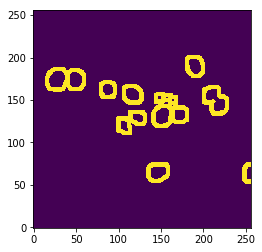

In [64]:
## STEP 2: Grayscale image and segment objects by thresholding images

# convert to grayscale
def grayscale(im):
    return rgb2gray(im)

# Otsu's Method, calculates optimal threshold for equal inter-/intra-class variance
def otsu(image_gray):
    threshold_val = threshold_otsu(image_gray) #Select threshold from Otsu's method
    img_masked = np.where(image_gray > threshold_val, 1, 0)

    if np.sum(img_masked==0) < np.sum(img_masked==1):
        img_masked = np.where(img_masked, 0, 1)
    return img_masked

# Function to convert float32 raw images to int8 single channel
def float2int8(img_float32):
##
    max_8bit = 255.0 # depends on dtype of image data
    max_16bit = 65535.0
    phi = 1
    theta = 1
  # increase intensity s.t. dark pixels become much brighter, bright pixels become slightly bright
    intensified_float32 = (max_8bit/phi)*(img_float32/(max_8bit/theta))**0.5
  # convert to int16 format for histogram equalization
    img_int16 = plt.array(intensified_float32, dtype=plt.uint16)
  # CLAHE (contrast limited adaptive histogram equalization)
  # >> https://docs.opencv.org/3.3.0/d3/dc1/tutorial_basic_linear_transform.html
    clahe = cv2.createCLAHE(clipLimit=50.0, tileGridSize=(20,20))
    img_clahe = clahe.apply(img_int16)
  # convert to int8 for threshold and watershed
    img_int8 = cv2.convertScaleAbs(img_clahe, alpha=(max_8bit/max_16bit))
    return img_int8

# Function to watershed segment images
def watershed(img_float32):
# >> http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_watershed/py_watershed.html
# >> http://scikit-image.org/docs/dev/user_guide/tutorial_segmentation.html
##
  # convert input image (float32) to 3-channel int8
    img3 = cv2.cvtColor(img_float32, cv2.COLOR_RGB2BGR)
    ch1,ch2,ch3 = cv2.split(img3)
    ret,thresh1 = cv2.threshold(float2int8(ch1),0,255,cv2.THRESH_OTSU)
    ret,thresh2 = cv2.threshold(float2int8(ch2),0,255,cv2.THRESH_OTSU)
    ret,thresh3 = cv2.threshold(float2int8(ch3),0,255,cv2.THRESH_OTSU)
    img_guess = cv2.merge((thresh1, thresh2, thresh3))
  
  # converge input image to 1-channel int8 grayscale and threshold (Otsu)
    img_grey = grayscale(img_float32)
    int8_grey = float2int8(img_grey)
    ret, int8_thresh = cv2.threshold(int8_grey,0,255,cv2.THRESH_OTSU)
  # noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(int8_thresh,cv2.MORPH_OPEN,kernel,iterations=2)
  # sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations=3)
    reduced_area = cv2.dilate(opening,kernel,iterations=10)
  # finding sure foreground area
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, sure_fg = cv2.threshold(dist_transform,0.2*dist_transform.max(),255,0)
  # finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)
  # marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers+1 # add one to all labels so sure background is 1 (not 0)
    markers[unknown==255] = 0 # mark unknown region as 0
  # apply watershed and mark boundary as -1
    markers = cv2.watershed(img_guess, markers)
    #img_guess[markers == -1] = [255,0,0]

    return img_guess, markers, sure_bg, sure_fg, unknown, reduced_area


#### TESTING
(img, mask) = load_zipped_img(path+'/stage1_train.zip', 5)

img3 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
ch1,ch2,ch3 = cv2.split(img3)
ret,thresh1 = cv2.threshold(float2int8(ch1),0,255,cv2.THRESH_OTSU)
ret,thresh2 = cv2.threshold(float2int8(ch2),0,255,cv2.THRESH_OTSU)
ret,thresh3 = cv2.threshold(float2int8(ch3),0,255,cv2.THRESH_OTSU)
img_guess = cv2.merge((thresh1, thresh2, thresh3))

img_grey = grayscale(img)
int8_grey = float2int8(img_grey)
ret, int8_thresh = cv2.threshold(int8_grey,0,255,cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(int8_thresh,cv2.MORPH_OPEN,kernel,iterations=2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
reduced_area = cv2.dilate(opening,kernel,iterations=10)

# finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.2*dist_transform.max(),255,0)

# finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1 # add one to all labels so sure background is 1 (not 0)
markers[unknown==255] = 0 # mark unknown region as 0

# apply watershed and mark boundary as -1
markers = cv2.watershed(img_guess, markers)
img_guess[markers == -1] = [255,0,0]

un=img[unknown==255]
print(un.shape)
print(un)

imgplot = plt.imshow(unknown, origin='lower')
plt.show()


# Separate Individual Objects

* The function separate_obj separates the objects in an image after a thresholding method has been applied
* The function convert2runlength finds the objects in an image (1 corresponds to object, 0 to backgroun) and finds runs of continuous object pixels
* The function rle generates a dataframe of images in run-length format. This is the output format required by the Kaggle competition

In [44]:
## STEP 3: Separate individual objects and encode in run-length format

# separate objects in image into individual masks
def separate_obj(img_masked):
    labels, nlabels = ndimage.label(img_masked)

    label_arrays = []
    for label_num in range(1, nlabels+1):
        label_mask = np.where(labels == label_num, 1, 0)
        label_arrays.append(label_mask)
    return labels, nlabels, label_mask

# convert path to run-length encoding (RLE) output format
def convert2runlength(x):
    obj = np.where(x.T.flatten()==1)[0] #1 corresponds to object, 0 to background
    run_lengths = []
    prev = -2
    for b in obj: # find continuous set of object pixels
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return " ".join([str(i) for i in run_lengths])

def rle(img_masked, im_id):
    (labels, nlabels, label_mask) = separate_obj(img_masked)
    im_df = pd.DataFrame()
    for label_num in range(1, nlabels+1):
        label_mask = np.where(labels == label_num, 1, 0)
        if label_mask.flatten().sum() > 10:
            rle = convert2runlength(label_mask)
            s = pd.Series({'ImageId': im_id, 'EncodedPixels': rle})
            im_df = im_df.append(s, ignore_index=True)
    return im_df

# Data Shape Manipulation

* The function one_index takes an image (2d array) and converts it to a 1d array. They are indexed from top to bottom then left to right
* The function pad_normalize helps account for variation in image sizes. It determines the maximum length in a set of one-indexed images and "pads" all other one-indexed images with zeros so that all images have the same length.

In [132]:
# one-indexes a 2d array into 1d, top down then left right, output is np 1d array
def one_index(arr2d):
    h, w = arr2d.shape[0:2]
    
    arr1d = []
    for col in range(0, w):
        for row in range(0, h):
            arr1d.append(arr2d[row][col])
    return np.array(arr1d)
    
# pads all vectors in array to have max_len, returns np array
def pad_normalize(array, max_len):
    for i in range(0, len(array)):
        vec = array[i]
        if len(vec) < max_len:
            array[i] = np.concatenate(( np.array(vec).reshape(1,-1), np.zeros((1, (max_len-len(vec)))) ), axis=1)
        else:
            array[i] = np.array(vec).reshape(1,-1)
    return np.array(array)

x=np.zeros((3,1))
y=np.ones((3,1))
z=np.ones((1,2))
print(z)
matr=np.concatenate((x,y),axis=1)
print(np.concatenate((matr,z),axis=0))

[[ 1.  1.]]
[[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  1.]]


# Training a Model

* X = a vector of one-indexed images that have been thresholded (The nuclei predicted by a thresholding method)
* Y = a vector containing the sum of the one-indexed masks for each image (The correct nuclei)
* Currently fits a SVM Classifier based on the grayscale intensity of unknown pixels. I could also add in more local features such as intensity gradient and watershed classification

In [138]:
## EXAMPLE TRAINING

z = zipfile.ZipFile(path+'/stage1_train.zip','r') # access zip folder
zlist = z.namelist() # list of files in zip directory
samples = zlist[0:n_samples-1] # 0 < samples <= 560

x_train = np.zeros(2).reshape(1,2) # predicted segmentation using Otsu's thresholding

y_train = np.zeros(1) # "correct" segmentation from sum of masks
max_len = 0
for i in range(0, n_samples):
    (img, masks) = load_zipped_img(path+'/stage1_train.zip', i) # loads image and associated masks
    m,n = img.shape[0:2]
    
    #x_raw = otsu(grayscale(img))
    (img_guess, markers, sure_bg, sure_fg, unknown, reduced_area) = watershed(img)
    #print(unknown)
    intensity=grayscale(img)
    img_guess=grayscale(img_guess)
    #Only take features from unknown region
    #print(intensity.shape)
    #print(img_guess.shape)
    
    intensity_raw = intensity[unknown==255].reshape(-1,1)
    watershed_raw = img_guess[unknown==255].reshape(-1,1)
    #print(intensity_raw.shape)
    #print(watershed_raw.shape)
    feature = np.concatenate((intensity_raw,watershed_raw), axis = 1)
    #print(feature.shape)
    #x_raw = grayscale(img)
    y_raw = sum(masks)
    y_raw = y_raw[unknown==255].reshape(-1,1)
    #x = np.resize(x_raw, (200, 200))
    #y = np.resize(y_raw, (200, 200))
    #x_vec = one_index(x)
    #y_vec = one_index(y)
    x_train = np.concatenate((x_train,feature),axis=0)
    y_train = np.append(y_train,y_raw).reshape(-1,1)
    print(x_train.shape)
    print(y_train.shape)
    #imgplot = plt.imshow(x, origin='lower')
    #plt.show()
    
    #imgplot = plt.imshow(y, origin='lower')
    #plt.show()
#     x_vec = one_index(otsu(grayscale(img)))
#     y_vec = one_index(sum(masks))
            
    #if len(x_vec) > max_len: max_len = len(x_vec)
    #x_train.append(x_vec)
    #y_train.append(y_vec)

#x_train = np.squeeze(pad_normalize(x_train, max_len), axis=1)
x_shortfeature = x_train[:, 0:5000]
print(x_shortfeature.shape)
#y_train = np.squeeze(pad_normalize(y_train, max_len), axis=1)
y_shortfeature = y_train[:, 0:5000]
print(y_shortfeature.shape)
clf = svm.SVC()
clf.fit(x_shortfeature, y_shortfeature)

# linreg = linear_model.LinearRegression() # create linear regression object
# linreg.fit(x_shortfeature, y_shortfeature) # train the model using the training sets

(6607, 2)
(6607, 1)
(14500, 2)
(14500, 1)
(44989, 2)
(44989, 1)
(44989, 2)
(44989, 1)


C:\Users\John\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Model Validation

* Tests the performance of the model
* Determines the number of true positives, true negatives, false positives and false negatives (Will add?)

In [147]:
# ## EXAMPLE TESTING

(img_test, mask_test) = load_zipped_img(path+'/stage1_train.zip', 100)

(img_guess, markers, sure_bg, sure_fg, unknown, reduced_area) = watershed(img_test)

X_test = grayscale(img_test).reshape(-1,1)
W_test = grayscale(img_guess).reshape(-1,1)
print(X_test.shape)
print(W_test.shape)
X_test = np.concatenate((X_test,W_test),axis=1)

y_pred = clf.predict(X_test) # predict using the testing set

y_pred=y_pred.reshape(-1,1)
# # Scoring
y_actual = one_index(sum(mask_test)).reshape(-1, 1)
#print(sum(y_actual))
#print(sum(y_pred))
accuracy = sklearn.metrics.accuracy_score(y_pred,y_actual)

print(accuracy)


#Generate Confusion Matrix
confusion_matrix(y_actual, y_pred)

(65536, 1)
(65536, 1)
0.775695800781


array([[49754,  7201],
       [ 7499,  1082]], dtype=int64)